# Non-parametric Statistics 
## Chapter 3.1: Kernel Regression
### Use of Different Kernels

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

from scipy import stats

In [2]:
# this code should work for anyone who cloned the project via github
# as it ensures that you have the correct project structure
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))
plots_folder = os.path.join(project_root, "plots/chap3")

# Please check this is correct path, hopefully it works fine
plots_folder

'/Users/adam/Desktop/Edinburgh/y4/MP/nonparam-stats-proj/plots/chap3'

In [3]:
# Define some kernels
def gaussian_kernel(x, sigma=1):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(- (x ** 2) / (2 * sigma ** 2))

def uniform_kernel(x):
    return np.where(np.abs(x) <= 1, 0.5, 0)

def epanechnikov_kernel(x):
    return np.where(np.abs(x) <= 1, 0.75 * (1 - x**2), 0)

def biweight_kernel(x):
    return np.where(np.abs(x) <= 1, 15/16 * (1 - x**2)**2, 0)

def cosine_kernel(x):
    return np.where(np.abs(x) <= 1, (np.pi / 4) * np.cos(np.pi * x / 2), 0)

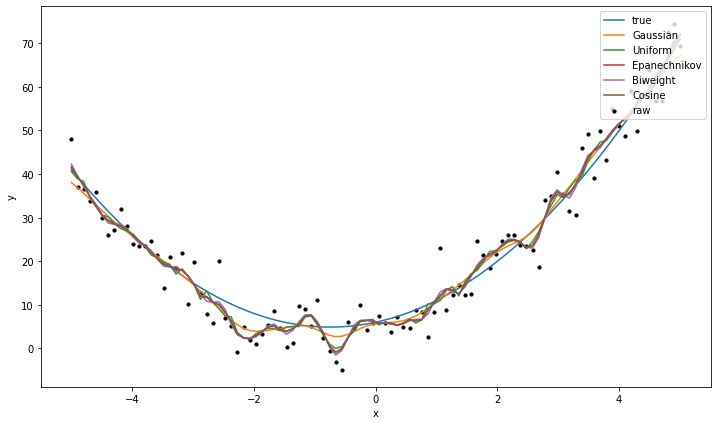

In [44]:
def custom_kr(Y, kernel_func, h, x_grid):
    rx = np.zeros_like(x_grid)
    for i in range(len(data)):
        wi = kernel_func((x_grid - x[i]) / h) / sum(kernel_func((x_grid - x[i]) / h))
        rx[i] = np.dot(wi, Y)
    return rx

x = np.linspace(-5, 5, 100)
data = 3*x + 2*x**2 + np.random.normal(0, 5, size = 100) + 6
true = 3*x + 2*x**2 + 6
h = .3

plt.figure(figsize=(12, 7))

plt.plot(x, true, label="true")
plt.scatter(x, data, label="raw", c="black", s=10)
plt.plot(x, custom_kr(data, gaussian_kernel, h, x), label="Gaussian")
plt.plot(x, custom_kr(data, uniform_kernel, h, x), label="Uniform")
plt.plot(x, custom_kr(data, epanechnikov_kernel, h, x), label="Epanechnikov")
plt.plot(x, custom_kr(data, biweight_kernel, h, x), label="Biweight")
plt.plot(x, custom_kr(data, cosine_kernel, h, x), label="Cosine")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")

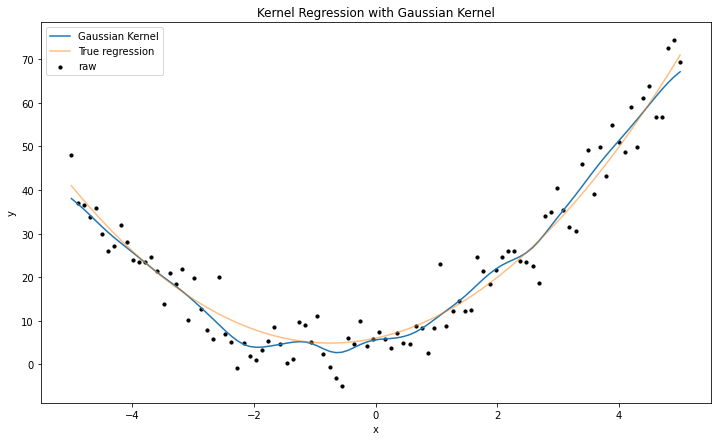

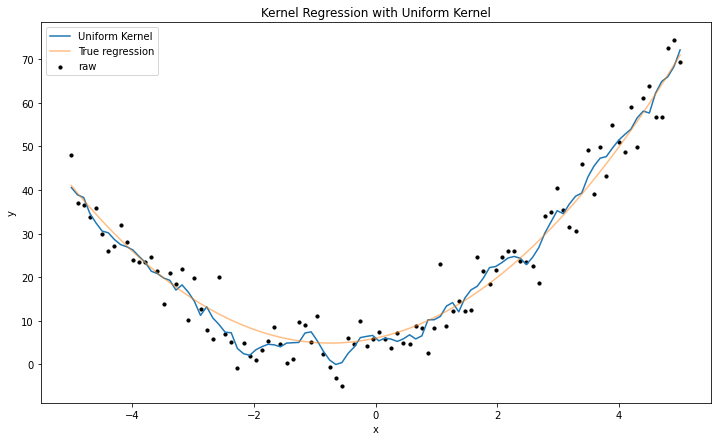

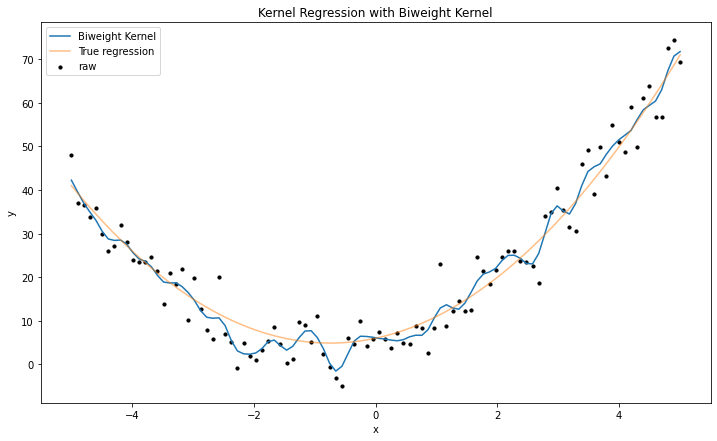

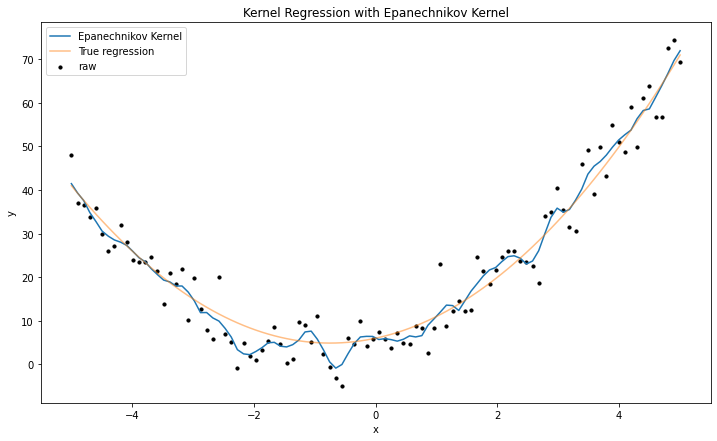

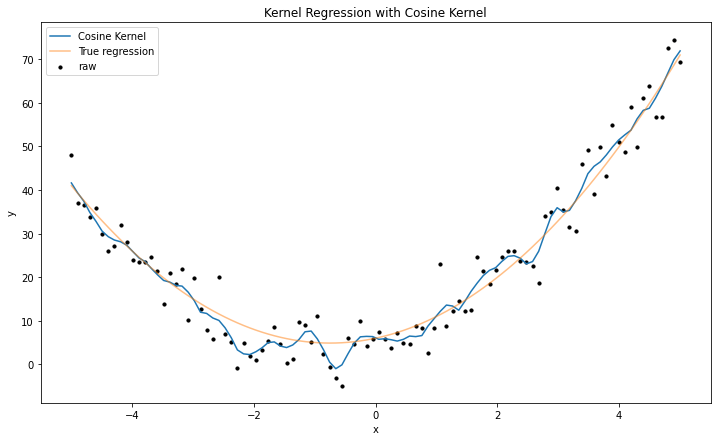

In [47]:
# Individual plots for clearer visualisaiton

kernels = [gaussian_kernel, uniform_kernel, biweight_kernel, epanechnikov_kernel, cosine_kernel]
kernel_names = ["Gaussian", "Uniform", "Biweight", "Epanechnikov", "Cosine"]


for kernel, name in zip(kernels, kernel_names):
    plt.figure(figsize=(12, 7))
    plt.scatter(x, data, label="raw", c="black", s=10)
    plt.plot(x, custom_kr(data, kernel, h, x), label=f'{name} Kernel')

    plt.plot(x, true, alpha=.5,label='True regression')

    plt.title(f'Kernel Regression with {name} Kernel')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.savefig(os.path.join(plots_folder, f"example-{name}-kr.png"))

    
    plt.show()

### variance and sample size